In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [43]:
df = pd.read_csv('clustering_elect.csv', index_col='user_id')

In [44]:
df.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000
1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000
1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286
1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000
1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158


In [45]:
df.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000
1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000
1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286
1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000
1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158


In [46]:
scale_df = StandardScaler().fit_transform(df)

In [47]:
df_scaled = df.copy()

In [48]:
for i in range(0, df.columns.size):
    df_scaled.iloc[:,i] = scale_df[:,i]

In [49]:
df_scaled.head()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.207052,-0.240367,-0.248761
1515915625353230683,3.723618,1.865938,-0.20593,-0.152518,4.294700,6.758762,-0.017137,-0.179435,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.211241,-0.417280,-0.342058
1515915625353234047,12.172272,-0.148511,-0.20593,-0.152518,13.907592,-0.217077,-0.017137,32.383784,-0.109423,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,0.100592,-0.405938,-0.047065
1515915625353236157,-0.317044,-0.148511,-0.20593,-0.152518,-0.302770,-0.217077,-0.017137,-0.179435,3.103082,-0.043972,...,-0.193037,-0.195211,-0.182636,-0.163982,-0.148481,-0.118888,-0.103584,-0.251918,-0.304237,-0.309442
1515915625353294441,13.274271,5.894836,-0.20593,-0.152518,15.161448,0.364243,-0.017137,3.248273,3.103082,-0.043972,...,-0.193037,-0.195211,1.626384,-0.163982,-0.148481,-0.118888,-0.103584,1.718633,-0.384187,0.119669


In [50]:
num = len(df_scaled.columns)

In [51]:
pca = PCA(n_components=num)
pca_array = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_array, index = df_scaled.index,
                      columns=[f"pca{num+1}" for num in range(df_scaled.shape[1])])



In [52]:
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625353226922,-0.816663,-0.495224,-0.375496,-0.780073,0.029689,0.800738,-0.226181,0.449369,-1.156782,-0.443086,...,-0.026346,0.043457,0.028670,0.008115,-0.001310,4.781093e-11,-4.419651e-13,6.914444e-13,-2.165589e-13,6.905915e-14
1515915625353230683,9.409541,-0.513531,-0.150293,-6.278019,2.590720,-5.790180,0.057344,-4.579977,3.810139,0.731441,...,-1.659492,-2.999070,-0.724692,-0.051399,-0.019400,2.602251e-14,6.010363e-14,1.931909e-14,2.155567e-13,4.505361e-15
1515915625353234047,27.709097,-1.756376,-8.827479,-3.712780,-1.805395,6.033558,-7.453126,0.831219,-1.586933,5.910922,...,5.530638,-4.679644,-2.380028,-1.422626,0.156174,-3.775254e-13,-1.136857e-13,-4.522708e-13,-1.565610e-12,6.360751e-14
1515915625353236157,-0.848223,-0.606592,0.307467,-0.164485,-0.021369,-0.148445,-0.556309,0.229152,0.679974,-0.881814,...,-0.436463,-0.151823,-0.023546,0.006751,0.001679,1.265279e-12,-6.354528e-13,2.925622e-12,5.821160e-12,-6.558692e-13
1515915625353294441,32.074835,0.226899,-9.742368,1.725132,-1.900327,17.676111,-15.385156,4.267343,-2.305335,-6.874237,...,2.826158,1.687719,-0.999397,0.856590,-0.197537,-3.285501e-14,1.780050e-14,-4.461312e-14,1.443288e-13,3.361486e-14


In [53]:
result = pd.DataFrame({'고윳값':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                       index = np.array([f"pca{num+1}" for num in range(df_scaled.shape[1])]))

result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,6.970289e+00,1.161698e-01,0.116170
pca2,2.740639e+00,4.567663e-02,0.161846
pca3,1.627101e+00,2.711794e-02,0.188964
pca4,1.411708e+00,2.352811e-02,0.212492
pca5,1.294859e+00,2.158066e-02,0.234073
pca6,1.263692e+00,2.106121e-02,0.255134
pca7,1.241438e+00,2.069032e-02,0.275825
pca8,1.215612e+00,2.025990e-02,0.296085
pca9,1.198884e+00,1.998110e-02,0.316066
pca10,1.158538e+00,1.930868e-02,0.335374


In [54]:
df.columns[~df.columns.str.contains('hour')]

Index(['user_id.1', 'user_session', 'event_type_cart', 'event_type_purchase',
       'event_type_view', 'category_code_electronics.audio.acoustic',
       'category_code_electronics.audio.dictaphone',
       'category_code_electronics.audio.headphone',
       'category_code_electronics.audio.microphone',
       'category_code_electronics.audio.music_tools.piano',
       'category_code_electronics.calculator',
       'category_code_electronics.camera.photo',
       'category_code_electronics.camera.video',
       'category_code_electronics.clocks', 'category_code_electronics.fax',
       'category_code_electronics.tablet',
       'category_code_electronics.telephone',
       'category_code_electronics.video.projector',
       'category_code_electronics.video.tv',
       'category_code_electronics.video.tv_remote', 'month_1.0', 'month_2.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
     

In [55]:
df_1 = df[df.columns[~df.columns.str.contains('hour')]]


In [56]:
num = len(df_1.columns)
pca = PCA(n_components=num)
pca_array = pca.fit_transform(df_1)
pca_df = pd.DataFrame(pca_array, index = df_1.index,
                      columns=[f"pca{num+1}" for num in range(df_1.shape[1])])

result = pd.DataFrame({'고윳값':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                       index = np.array([f"pca{num+1}" for num in range(df_1.shape[1])]))

result['누적기여율'] = result['기여율'].cumsum()
result

,고윳값,기여율,누적기여율
pca1,5.175259e+05,8.871707e-01,0.887171
pca2,6.327994e+04,1.084779e-01,0.995649
pca3,2.498907e+03,4.283760e-03,0.999932
pca4,1.776668e+01,3.045660e-05,0.999963
pca5,3.605545e+00,6.180819e-06,0.999969
pca6,2.106756e+00,3.611515e-06,0.999973
pca7,2.010103e+00,3.445826e-06,0.999976
pca8,1.756805e+00,3.011609e-06,0.999979
pca9,1.642612e+00,2.815853e-06,0.999982
pca10,1.534059e+00,2.629767e-06,0.999985


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [36] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


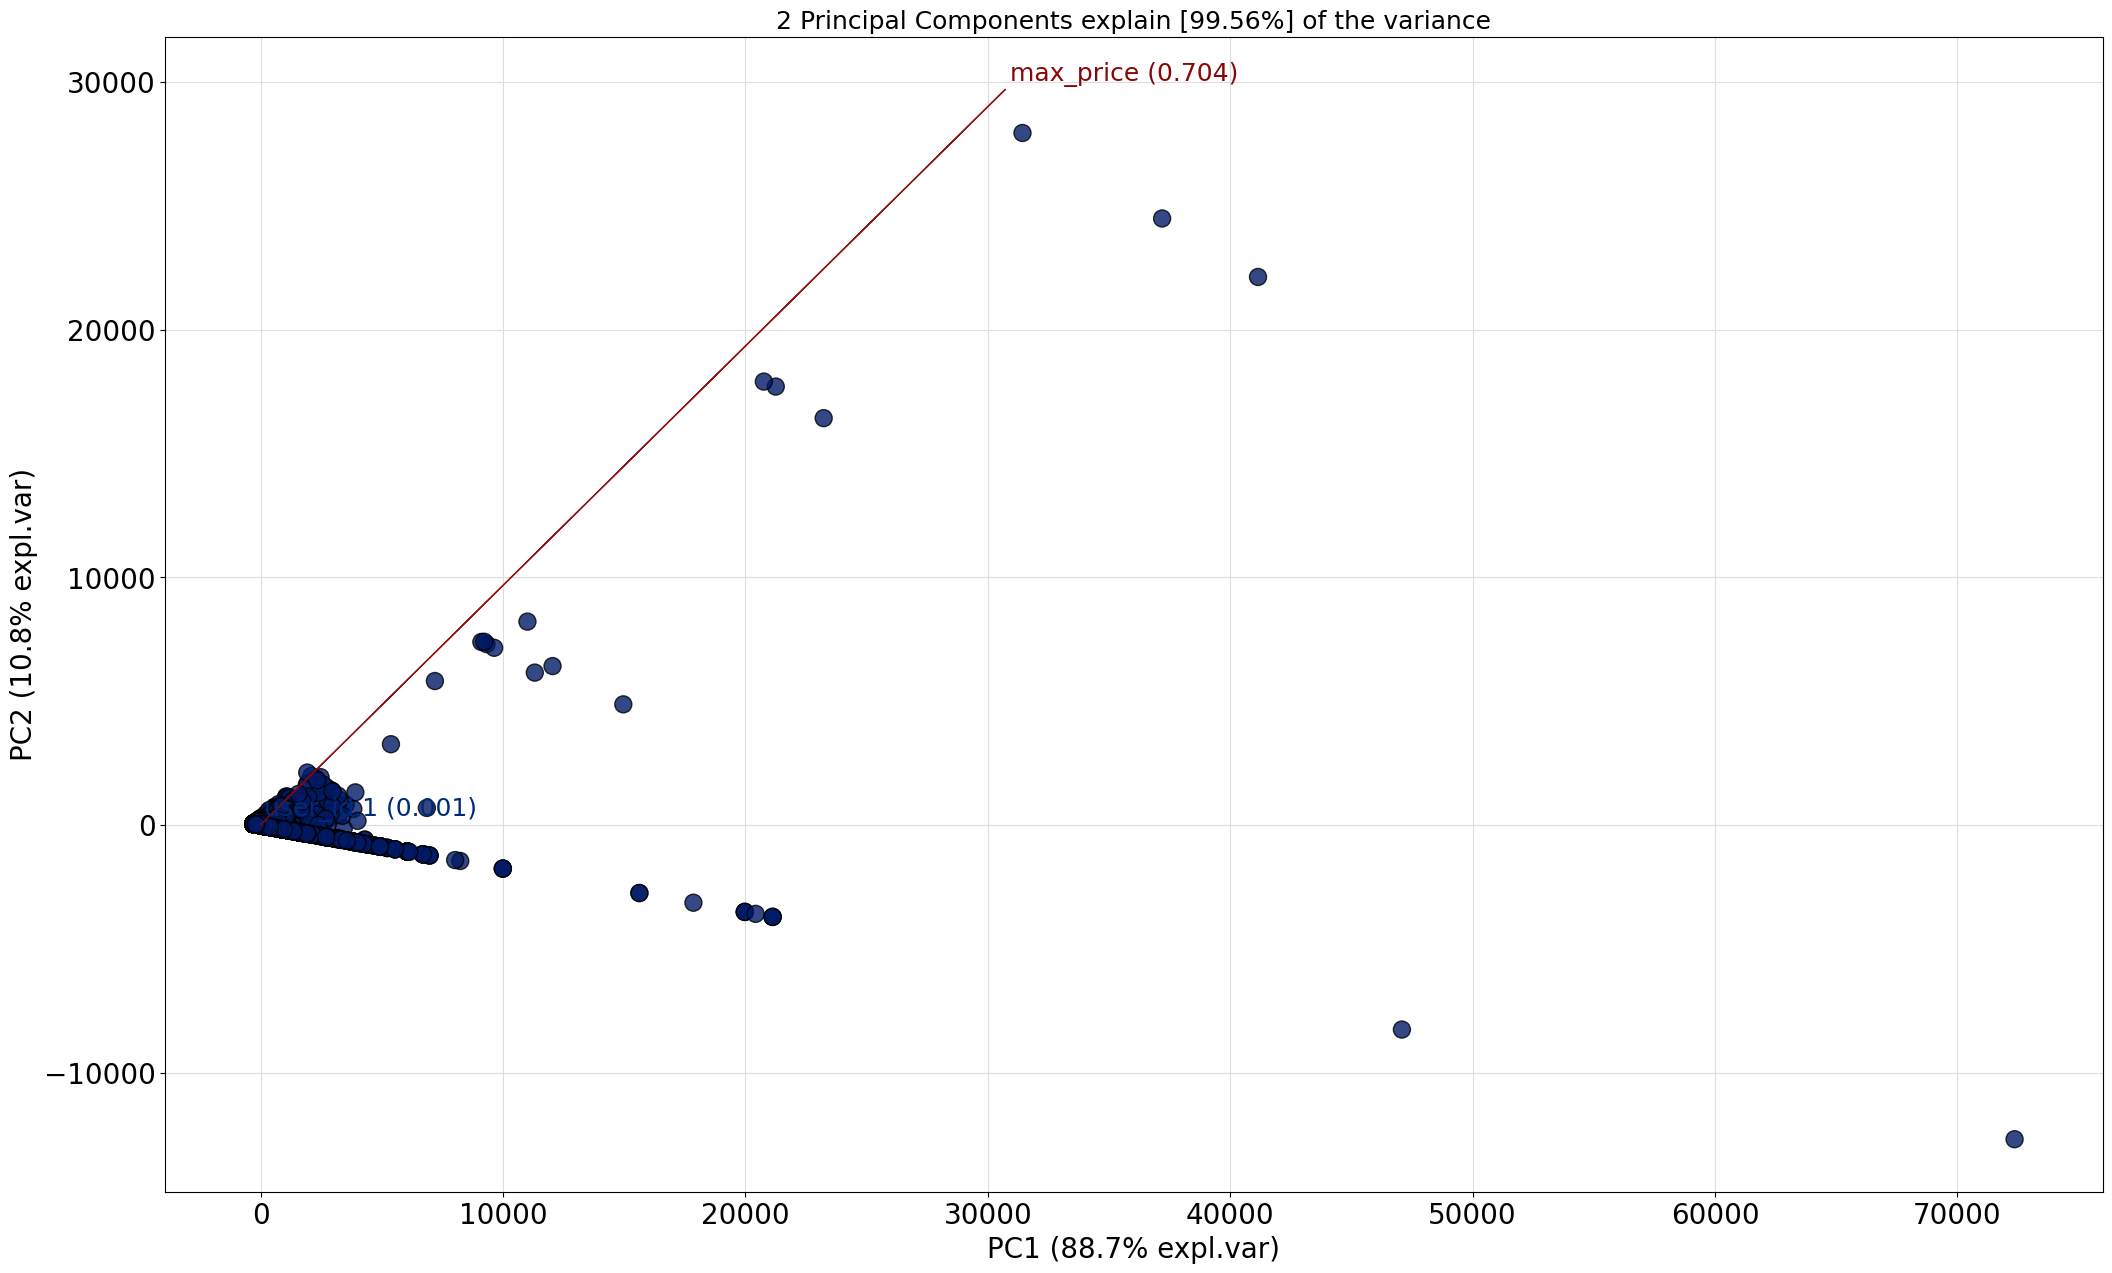

In [58]:
from pca import pca
import seaborn as sns

pca1 = PCA(n_components=2)
pca_array = pca1.fit_transform(df_1)
pca_df = pd.DataFrame(pca_array, index = df_1.index,columns = ['pca1','pca2'])

model = pca(n_components=2)
results = model.fit_transform(df_1)
fig, ax = model.biplot(n_feat = 2, legend = False)